R-squared Score: 0.8355422116950025


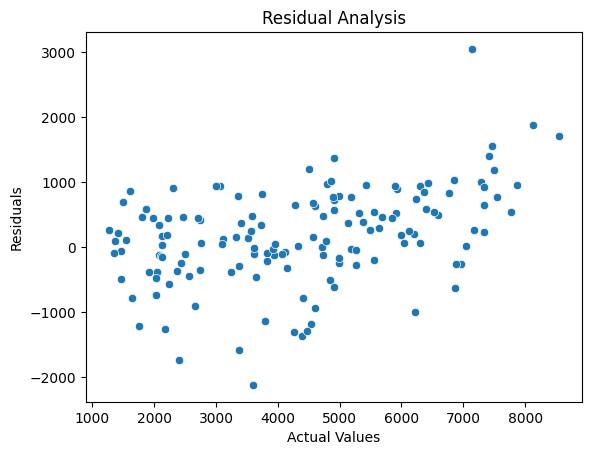

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
# Assuming the dataset is in a CSV file named 'bike_sharing_data.csv'
df = pd.read_csv('/Users/applemac/downloads/day.csv')

# Display the first few rows of the dataset to get a quick overview
df.head()

# Data Preprocessing

# Convert categorical variables to categorical strings
df['weathersit'] = df['weathersit'].astype('str')
df['season'] = df['season'].astype('str')

# Check if there are any missing values
missing_values = df.isnull().sum()


# Decide whether to keep or drop the 'yr' column
# For this example, we'll keep it

# Split the data into features (X) and target variable (y)
X = df[['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed']]
y = df['cnt']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Building

# Create a linear regression model
model = LinearRegression()

# Train the model on the training set
model.fit(X_train, y_train)

# Model Evaluation

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the R-squared score
r2 = r2_score(y_test, y_pred)
print(f'R-squared Score: {r2}')

# Residual Analysis

# Calculate residuals
residuals = y_test - y_pred

# Plot residuals
sns.scatterplot(x=y_test, y=residuals)
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residual Analysis')
plt.show()



      Variable  Coefficient
0       season   529.531598
1           yr  1999.661879
2         mnth   -48.848705
3      holiday  -487.525176
4      weekday    67.965575
5   workingday   149.571076
6   weathersit  -605.282995
7         temp   -28.824276
8        atemp   145.813005
9          hum    -9.677786
10   windspeed   -35.937143


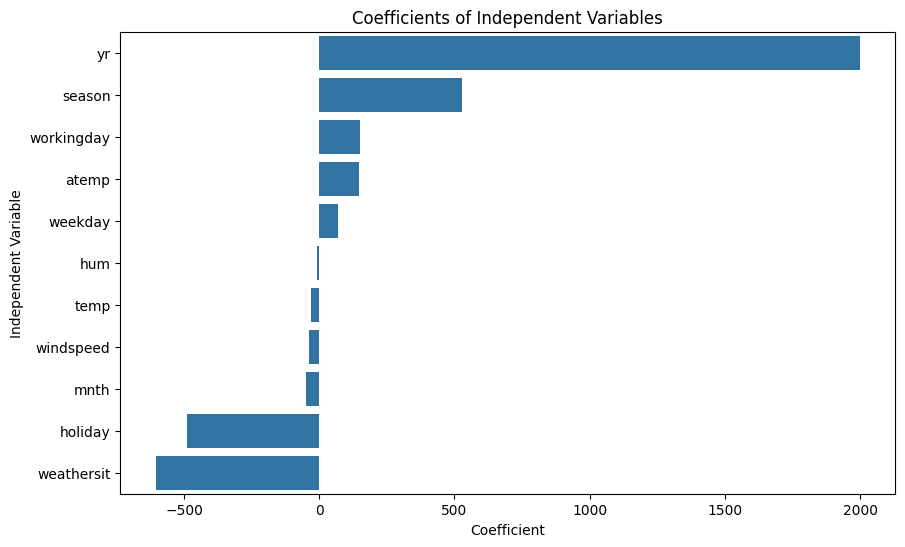

In [4]:
# Display the coefficients and intercept
coefficients = pd.DataFrame({'Variable': X.columns, 'Coefficient': model.coef_})
print(coefficients)

# Plot the coefficients to visualize their importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Variable', data=coefficients.sort_values(by='Coefficient', ascending=False))
plt.title('Coefficients of Independent Variables')
plt.xlabel('Coefficient')
plt.ylabel('Independent Variable')
plt.show()
